# Importação de bibliotecas

In [1]:
import pandas as pd
import statistics as stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Recebendo arquivos csv

In [2]:
aux = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('datasets_31029_40943_noc_regions.csv')

#### Verifcando o arquivo aux

In [3]:
aux.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


#### Verificando o arquivo regions

In [4]:
regions.head(3)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


In [5]:
aux.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Adicionando os dois arquivos em um unico dataframe

In [6]:
data = pd.merge(aux, regions, how='left')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### Verificando as colunas do arquivo e traduzindo para pt_BR

In [7]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [8]:
data.columns = ['ID','Nome','Sexo','Idade','Altura','Peso','Time','Sigla','Jogos','Ano','Temporada','Cidade','Esporte','Evento','Medalha','Região','Notas']

In [9]:
data.head(3)

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogos,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Região,Notas
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [10]:
data['Temporada'].replace({'Summer':'Verão','Winter':'Inverno'},inplace=True)
data.tail(2)

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogos,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Região,Notas
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Inverno,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Inverno,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


### Verificando a quantidade de dados faltando em cada classe

In [11]:
data.isnull().sum()

ID                0
Nome              0
Sexo              0
Idade          9474
Altura        60171
Peso          62875
Time              0
Sigla             0
Jogos             0
Ano               0
Temporada         0
Cidade            0
Esporte           0
Evento            0
Medalha      231333
Região          370
Notas        266077
dtype: int64

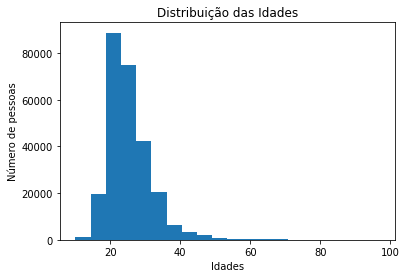

In [12]:
plt.hist(data['Idade'].dropna(),bins=20) 
# Plot grafico: idades x n_atletas , excluindo idades faltando
plt.title('Distribuição das Idades')
plt.ylabel('Número de pessoas')
plt.xlabel('Idades')
plt.show()

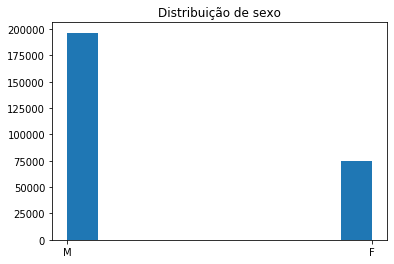

In [13]:
plt.hist(data['Sexo'].dropna())
plt.title('Distribuição de sexo')
plt.show()

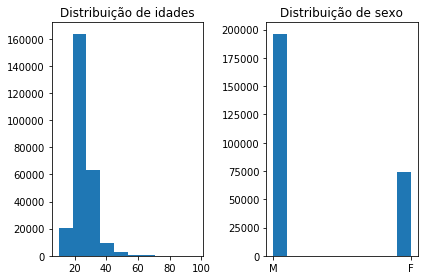

In [14]:
plt.subplot(1,2,1)
plt.hist(data['Idade'].dropna())
plt.title('Distribuição de idades')

plt.subplot(1,2,2)
plt.hist(data['Sexo'].dropna())
plt.title('Distribuição de sexo')

plt.tight_layout()
plt.show()

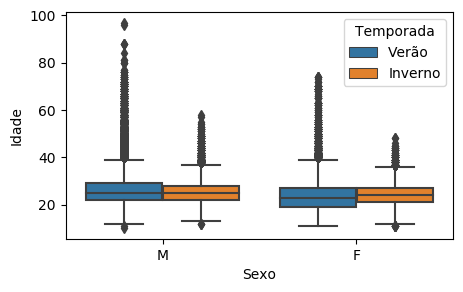

In [15]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(data=data,x='Sexo',y='Idade',hue='Temporada')
# Pontos pretos são os outliers 

### Mulheres que participaram x ano

In [20]:
mulheres = data[(data.Sexo == 'F')]
# Mulheres é um dataframe só com sexo feminino

In [19]:
mulheres.head(3)

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogos,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Região,Notas
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Inverno,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Inverno,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Inverno,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


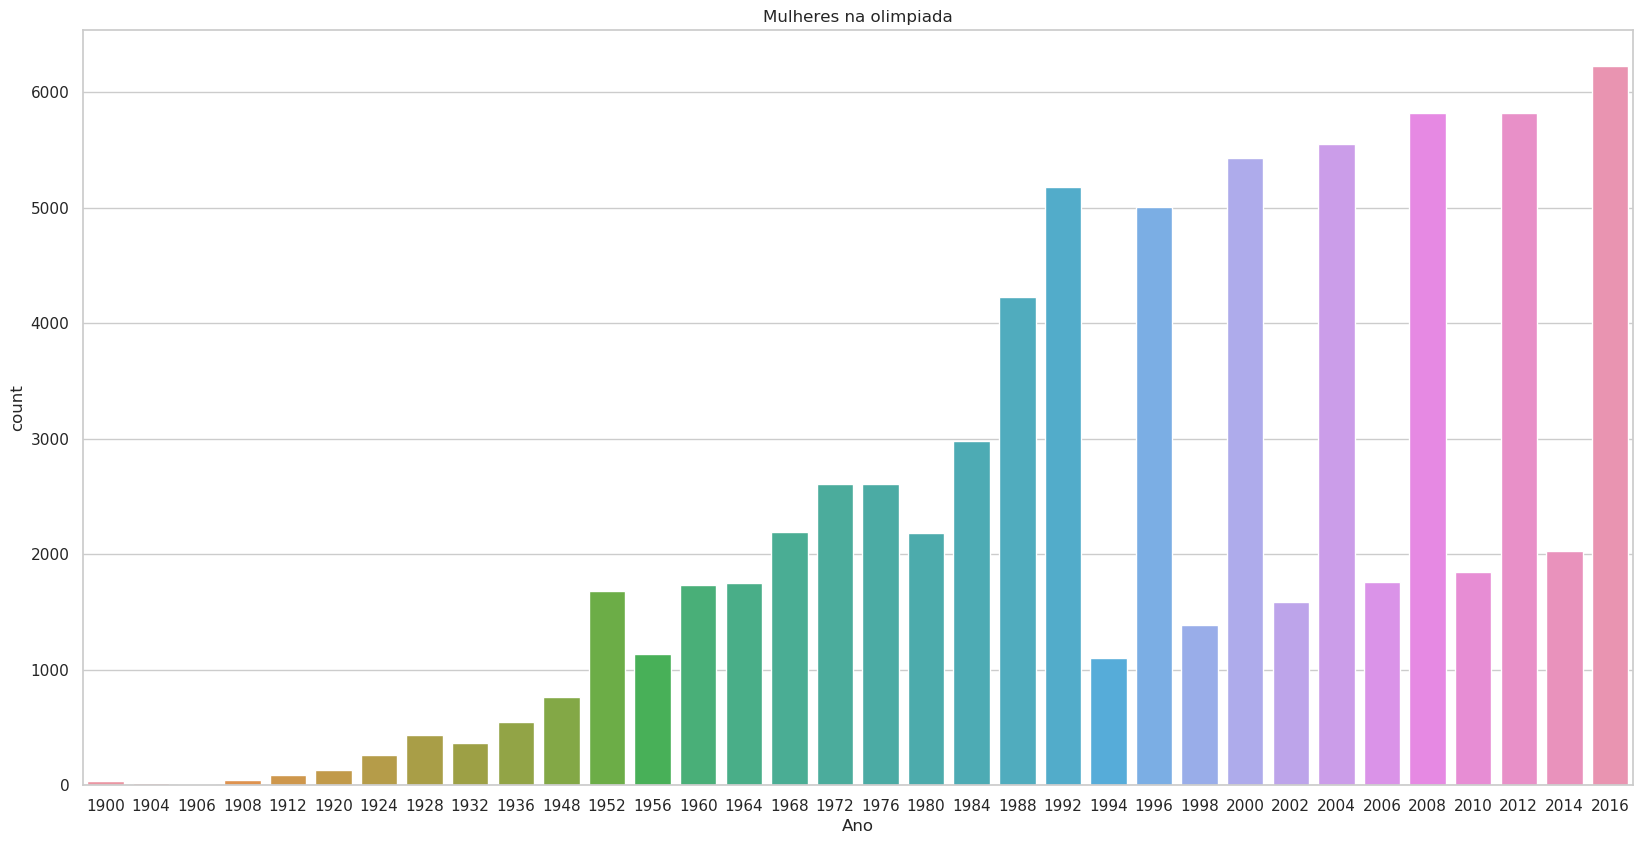

In [29]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,10),dpi=100)
sns.countplot(x='Ano',data=mulheres)
plt.title('Mulheres na olimpiada')
plt.show()

In [38]:
mulheres['ID'].loc[mulheres['Ano']==2016].count()
# Mostra que em 2016 ,6223 mulheres competiram nas olimpiadas

6223

### Total de Medalhas de Ouro por país

In [50]:
gold = data[(data.Medalha=='Gold')]

In [51]:
gold.head(3)

,ID,Nome,Sexo,Idade,Altura,Peso,Time,Sigla,Jogos,Ano,Temporada,Cidade,Esporte,Evento,Medalha,Região,Notas
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Verão,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Verão,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Verão,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN


In [85]:
gold.Região.value_counts().reset_index(name='Medalha').head(10)

,index,Medalha
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


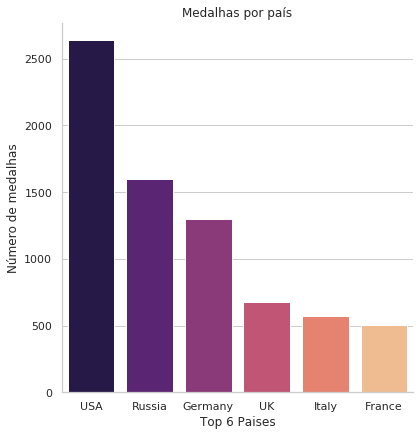

In [83]:
total_gold = gold.Região.value_counts()\
                        .reset_index(name='Medalha').head(6)

g = sns.catplot(x='index',y='Medalha',
                data=total_gold,height=6,kind='bar',palette='magma')

g.set_xlabels('Top 6 Paises')
g.set_ylabels('Número de medalhas')
plt.title('Medalhas por país')

plt.show()

### Distribuição de participantes(Sexo) por ano
#### Kernel density estimation (kde plot)

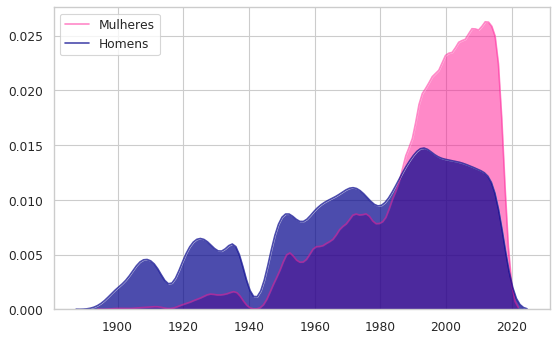

In [116]:
plt.figure(figsize=(8,5),dpi=80)

sns.kdeplot(data['Ano'].loc[data['Sexo']=='F'],shade=True,
            color='deeppink',label='Mulheres',alpha=0.5)

sns.kdeplot(data['Ano'].loc[data['Sexo']=='M'],shade=True,
            color='darkblue',label='Homens',alpha=0.7)

plt.show()

##### Perceba que a queda de participantes no ano de 1940 se deve pelo inicio da 2º guerra mundial, que acabou por cancelar as olimpiadas. O grafico não 'desceu' para 0 totalmente pois o evento ja havia iniciado e foi posteriormente cancelado em maio de 1940.
##### É possível notar a partir da análise do gráfico que a participação das mulheres ao longo das decádas se faz cada vez mais presente

Em 1917 uma francesa chamada Alice Milliat criou a Federação Esportiva Feminina Internacional (FEFI), a fim de permitir que as mulheres competissem no atletismo.